# Get the model metadata from ModelMesh Server via GRPC

#### Set grpc endpoint and model name

In [1]:
!pip install grpcio grpcio-tools 

In [2]:
grpc_host = "modelmesh-serving"
grpc_port = 8033
model_name = "stocks"

#### Imports

In [3]:
# grpc_predict_v2_pb2 and grpc_predict_v2_pb2_grpc were created from grpc_predict_v2.proto using protoc
import grpc
import grpc_predict_v2_pb2
import grpc_predict_v2_pb2_grpc

#### Create grpc channel and stub

In [4]:
channel = grpc.insecure_channel(f"{grpc_host}:{grpc_port}")
stub = grpc_predict_v2_pb2_grpc.GRPCInferenceServiceStub(channel)

### Model Metadata
The per-model metadata API provides information about a model. Errors are indicated by the google.rpc.Status returned for the request. The OK code indicates success and other codes indicate failure.

In [5]:
request = grpc_predict_v2_pb2.ModelMetadataRequest(name=model_name)
response = stub.ModelMetadata(request)
print(response)

name: "stocks__isvc-286d8ce264"
versions: "1"
platform: "OpenVINO"
inputs {
  name: "lstm_input"
  datatype: "FP32"
  shape: -1
  shape: 60
  shape: 1
}
outputs {
  name: "dense"
  datatype: "FP32"
  shape: -1
  shape: 1
}



In [6]:
import time

def rhods_grpc_request(data):
    # request content building
    inputs = []
    inputs.append(grpc_predict_v2_pb2.ModelInferRequest().InferInputTensor())
    inputs[0].name = "lstm_input"
    inputs[0].datatype = "FP32"
    inputs[0].shape.extend([69, 60, 1])
    arr = data.flatten()
    inputs[0].contents.fp32_contents.extend(arr)

    # request building
    request = grpc_predict_v2_pb2.ModelInferRequest()
    request.model_name = model_name
    request.inputs.extend(inputs)

    response = stub.ModelInfer(request)    
    result_arr = np.frombuffer(response.raw_output_contents[0], dtype=np.float32)
    return result_arr

In [7]:
import numpy as np

data = np.random.uniform(low=100.1, high=125.1, size=(69, 60, 1))
predicted_stock_price = rhods_grpc_request(data)
predicted_stock_price

array([2.0165935, 2.0163853, 2.0165613, 2.0165145, 2.016704 , 2.0167134,
       2.0164735, 2.0165184, 2.0164912, 2.0166342, 2.016258 , 2.0165398,
       2.016616 , 2.0164497, 2.016709 , 2.0163226, 2.0165951, 2.0166519,
       2.016386 , 2.0165362, 2.016395 , 2.0164697, 2.0165513, 2.016698 ,
       2.0167074, 2.0165718, 2.0164483, 2.0166597, 2.0163343, 2.0166032,
       2.0165582, 2.016504 , 2.0163574, 2.0164456, 2.016542 , 2.0164878,
       2.01652  , 2.0164843, 2.016653 , 2.0165966, 2.0165336, 2.0165524,
       2.0164025, 2.0166016, 2.0163498, 2.0165749, 2.0165002, 2.0165005,
       2.0164812, 2.0166166, 2.0165393, 2.0165994, 2.016617 , 2.0165055,
       2.016618 , 2.0163405, 2.016458 , 2.0165546, 2.016535 , 2.0163968,
       2.0166526, 2.0166073, 2.0164814, 2.0165117, 2.0165255, 2.0166614,
       2.016557 , 2.0165286, 2.016222 ], dtype=float32)

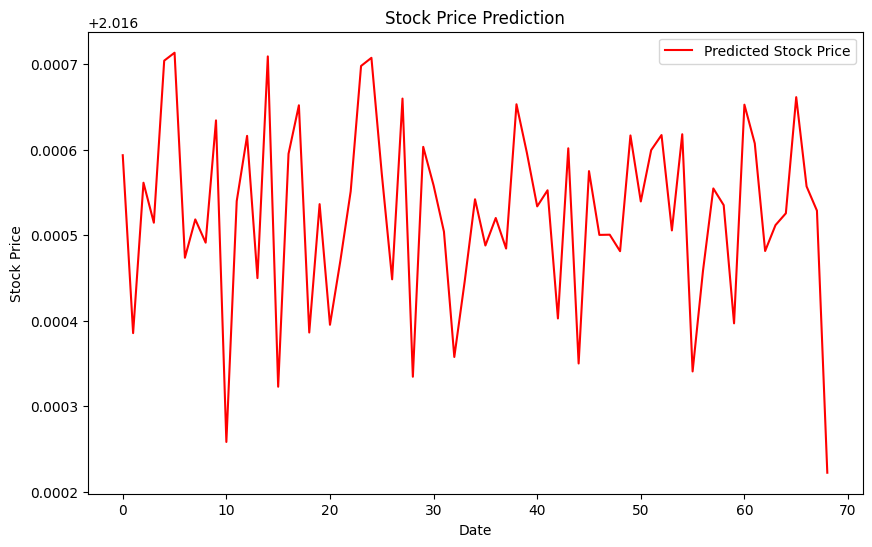

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    predicted_stock_price, color="red", label="Predicted Stock Price"
)
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()